In [1]:
# !pip install fastai
# !pip install gradio
# !pip install timm

In [2]:
from fastai.vision.all import *
import gradio as gr
import pathlib
pathlib.PosixPath = pathlib.WindowsPath
import timm

In [ ]:

# temp = pathlib.PosixPath


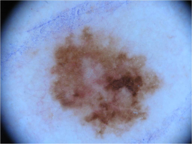

In [3]:
im = PILImage.create('melanoma.jpg')
im.thumbnail((192,192))
im

In [4]:
learn = load_learner('export.pkl')
learn2 = load_learner('export_cancer_type.pkl')

In [5]:
learn2.predict(im)

('melanoma',
 tensor(3),
 tensor([1.4456e-03, 1.0283e-04, 6.1242e-04, 7.6649e-01, 2.2753e-01, 2.3810e-03,
         6.9470e-04, 1.0568e-04, 6.3854e-04]))

In [23]:
categories = ('Benign', 'Malignant')
categories2 = (
"Actinic Keratosis",
"Basal Cell Carcinoma",
"Dermatofibroma",
"Melanoma",
"Nevus",
"Pigmented Benign Keratosis",
"Seborrheic Keratosis",
"Squamous Cell Carcinoma",
"Vascular Lesion",
)

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    pred2,idx2,probs2 = learn2.predict(img)
    return dict(zip(categories, map(float,probs))), dict(zip(categories2, map(float,probs2)))

In [24]:
classify_image(im)

({'Benign': 0.4016205072402954, 'Malignant': 0.5983794927597046},
 {'actinic keratosis': 0.0014456179924309254,
  'basal cell carcinoma': 0.00010283248411724344,
  'dermatofibroma': 0.0006124223582446575,
  'melanoma': 0.7664883136749268,
  'nevus': 0.22753091156482697,
  'pigmented benign keratosis': 0.0023810004349797964,
  'seborrheic keratosis': 0.0006947041256353259,
  'squamous cell carcinoma': 0.00010568421566858888,
  'vascular lesion': 0.0006385358283296227})

In [ ]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
label2 = gr.outputs.Label()
examples = ['Benign1.jpg','Benign2.jpg','Benign3.jpg', 'Malignant1.jpg', 'Malignant2.jpg', 'Malignant3.jpg', "melanoma.jpg", "actinic keratosis.jpg", "squamous cell carcinoma.jpg"]

intf = gr.Interface(fn=classify_image, inputs=image, outputs=[label,label2], examples=examples)
intf.launch(inline=False)

c:\Users\ntram\Anaconda3\lib\site-packages\gradio\inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
c:\Users\ntram\Anaconda3\lib\site-packages\gradio\inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
c:\Users\ntram\Anaconda3\lib\site-packages\gradio\outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
c:\Users\ntram\Anaconda3\lib\site-packages\gradio\outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
